In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# (a)
df = pd.read_csv("dea.csv")
df.head()

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment16,Treatment17,Treatment18,Treatment19,Treatment20,Treatment21,Treatment22,Treatment23,Treatment24,Treatment25
0,Gene1,56,97,19,76,65,25,87,91,79,...,55,59,68,7,55,11,25,77,43,22
1,Gene2,8,93,64,18,13,94,57,6,88,...,91,66,44,89,84,86,57,28,30,93
2,Gene3,64,45,33,19,49,69,93,75,13,...,82,7,5,9,94,18,31,13,83,19
3,Gene4,94,46,81,55,67,56,8,98,27,...,74,76,31,13,66,41,55,48,28,83
4,Gene5,63,36,92,56,66,62,56,16,43,...,77,63,74,84,97,7,24,63,40,23


In [17]:
# (b)
control = [c for c in df.columns if 'Control' in c]
treatment = [c for c in df.columns if 'Treatment' in c]

print("Control Columns: ", control)
print("Treament Columns: ", treatment)

Control Columns:  ['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15', 'Control16', 'Control17', 'Control18', 'Control19', 'Control20', 'Control21', 'Control22', 'Control23', 'Control24', 'Control25']
Treament Columns:  ['Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5', 'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10', 'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14', 'Treatment15', 'Treatment16', 'Treatment17', 'Treatment18', 'Treatment19', 'Treatment20', 'Treatment21', 'Treatment22', 'Treatment23', 'Treatment24', 'Treatment25']


In [18]:
# (c)
df['Control_Mean'] = df[control].mean(axis=1)
df['Treatment_Mean'] = df[treatment].mean(axis=1)

In [19]:
# (d)
epsilon = 1e-6
df['Fold_Change'] = (df['Treatment_Mean']+epsilon) / (df['Control_Mean']+epsilon)

df['log2FC'] = np.log2(df['Fold_Change'])

In [20]:
# (e)
up_regulated = df[df['Fold_Change'] >= 1.6]
down_regulated = df[df['Fold_Change'] < 0.67]

print(f"Up: {len(up_regulated)}, Down: {len(down_regulated)}")
print("\nTop 5 up: ", up_regulated[['Gene','Fold_Change']].head().values)
print("\nTop 5 down: ", down_regulated[['Gene', 'Fold_Change']].head().values)

display(up_regulated[["Gene","Control_Mean","Treatment_Mean","Fold_Change","log2FC"]])
display(down_regulated[["Gene","Control_Mean","Treatment_Mean","Fold_Change","log2FC"]])

Up: 0, Down: 0

Top 5 up:  []

Top 5 down:  []


,Gene,Control_Mean,Treatment_Mean,Fold_Change,log2FC


,Gene,Control_Mean,Treatment_Mean,Fold_Change,log2FC


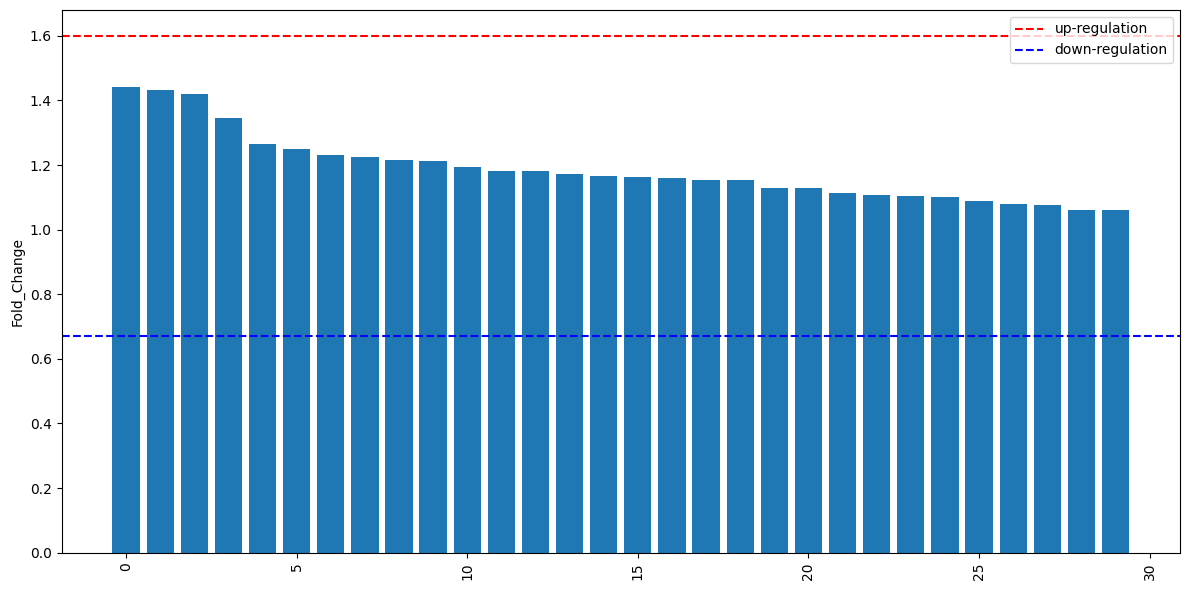

In [21]:
# (f)
plt.figure(figsize=(12,6))
plt.bar(df.index[:30],df['Fold_Change'].sort_values(ascending=False)[:30])
plt.axhline(y=1.6, color='r', linestyle='--', label='up-regulation')
plt.axhline(y=0.67, color='b', linestyle='--', label='down-regulation')
plt.xticks(rotation=90)
plt.ylabel('Fold_Change')
plt.legend()
plt.tight_layout()
plt.show()